In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# CitiBike Data Project

#### Build an End-to-End Data Project using CitiBike Ride Data

1. Data Ingestion
2. EDA
3. Problem Framing
4. Define 
5. Product Design
6. Optimize Forecast Model
7. Dashboard w Predictions
8. Presentation



In [16]:
# let's look at 1 CSV as a sample for EDA since the dataset is potentially large
sample_df =  pd.read_csv("/Users/westonshuken/Documents/_2025/CitiBike/Data/citibike_tripdata_2022/202201-citibike-tripdata_1.csv", dtype={'start_station_id': str, 'end_station_id': str})

In [17]:
# list of columns
sample_df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [18]:
sample_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member
1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member
2,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member
3,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member
4,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.10,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member


In [19]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ride_id             1000000 non-null  object 
 1   rideable_type       1000000 non-null  object 
 2   started_at          1000000 non-null  object 
 3   ended_at            1000000 non-null  object 
 4   start_station_name  1000000 non-null  object 
 5   start_station_id    1000000 non-null  object 
 6   end_station_name    990711 non-null   object 
 7   end_station_id      990711 non-null   object 
 8   start_lat           1000000 non-null  float64
 9   start_lng           1000000 non-null  float64
 10  end_lat             993386 non-null   float64
 11  end_lng             993386 non-null   float64
 12  member_casual       1000000 non-null  object 
dtypes: float64(4), object(9)
memory usage: 99.2+ MB


In [20]:
sample_df.nunique()

ride_id               1000000
rideable_type               2
started_at             999964
ended_at               999321
start_station_name       1528
start_station_id         1523
end_station_name         1518
end_station_id           1514
start_lat                1961
start_lng                1955
end_lat                  1962
end_lng                  1952
member_casual               2
dtype: int64

In [21]:
sample_df.groupby('rideable_type').count()['ride_id'] / sample_df['ride_id'].count() * 100

rideable_type
classic_bike     57.472
electric_bike    42.528
Name: ride_id, dtype: float64

In [22]:
sample_df.groupby('member_casual').count()['ride_id'] / sample_df['ride_id'].count() * 100

member_casual
casual    14.2931
member    85.7069
Name: ride_id, dtype: float64

In [23]:
sample_df.groupby(['member_casual', 'rideable_type']).size() 

member_casual  rideable_type
casual         classic_bike      63890
               electric_bike     79041
member         classic_bike     510830
               electric_bike    346239
dtype: int64

In [24]:
sample_df.groupby(['member_casual', 'rideable_type']).size() / sample_df.groupby('member_casual').count()['ride_id']

member_casual  rideable_type
casual         classic_bike     0.446999
               electric_bike    0.553001
member         classic_bike     0.596020
               electric_bike    0.403980
dtype: float64

In [25]:
temp_series = sample_df.groupby(['rideable_type', 'member_casual']).size() / sample_df.groupby('rideable_type').count()['ride_id']
temp_series

rideable_type  member_casual
classic_bike   casual           0.111167
               member           0.888833
electric_bike  casual           0.185856
               member           0.814144
dtype: float64

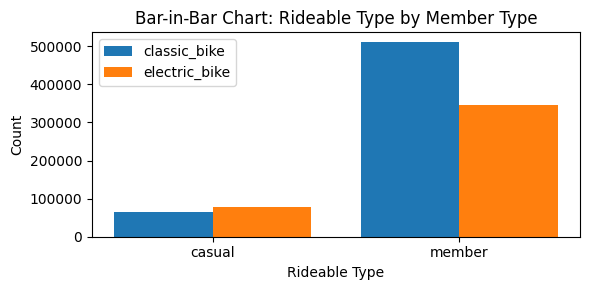

In [26]:
temp_series = sample_df.groupby(['rideable_type', 'member_casual']).size()
sample_pivot = temp_series.reset_index(name='count').pivot(index='member_casual', columns='rideable_type', values='count')

x = np.arange(len(sample_pivot.index))
bar_width = 0.4

# Plot the bars
fig, ax = plt.subplots(figsize=(6, 3))
ax.bar(x - bar_width / 2, sample_pivot['classic_bike'], width=bar_width, label='classic_bike')
ax.bar(x + bar_width / 2, sample_pivot['electric_bike'], width=bar_width, label='electric_bike')

# Add labels and title
ax.set_xlabel('Rideable Type')
ax.set_ylabel('Count')
ax.set_title('Bar-in-Bar Chart: Rideable Type by Member Type')
ax.set_xticks(x)
ax.set_xticklabels(sample_pivot.index)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


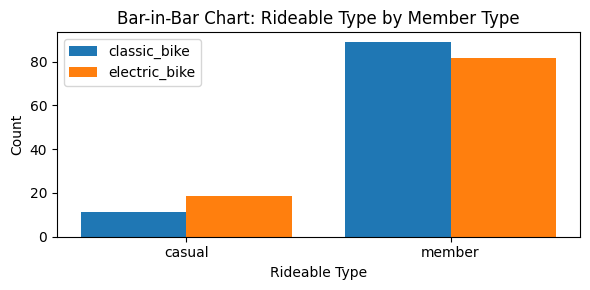

In [27]:
temp_series = sample_df.groupby(['rideable_type', 'member_casual']).size() / sample_df.groupby('rideable_type').count()['ride_id'] * 100
sample_pivot = temp_series.reset_index(name='count').pivot(index='member_casual', columns='rideable_type', values='count')

x = np.arange(len(sample_pivot.index))
bar_width = 0.4

# Plot the bars
fig, ax = plt.subplots(figsize=(6, 3))
ax.bar(x - bar_width / 2, sample_pivot['classic_bike'], width=bar_width, label='classic_bike')
ax.bar(x + bar_width / 2, sample_pivot['electric_bike'], width=bar_width, label='electric_bike')

# Add labels and title
ax.set_xlabel('Rideable Type')
ax.set_ylabel('Count')
ax.set_title('Bar-in-Bar Chart: Rideable Type by Member Type')
ax.set_xticks(x)
ax.set_xticklabels(sample_pivot.index)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


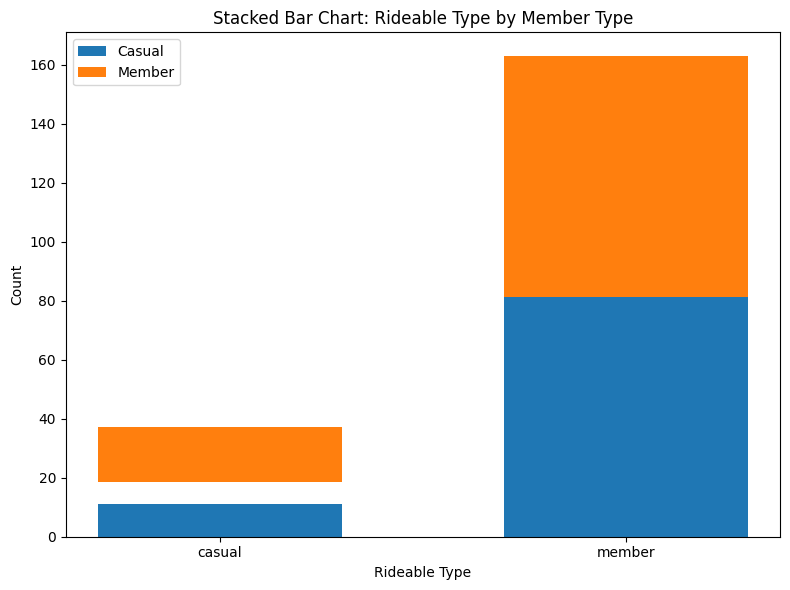

In [28]:
# Define bar positions and width
x = np.arange(len(sample_pivot.index))  # Positions for rideable types
bar_width = 0.6  # Stacked bars have a single width

# Plot the stacked bars
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the first category
ax.bar(x, sample_pivot['classic_bike'], width=bar_width, label='Casual')

# Plot the second category on top of the first
ax.bar(x, sample_pivot['electric_bike'], width=bar_width, bottom=sample_pivot['electric_bike'], label='Member')

# Add labels and title
ax.set_xlabel('Rideable Type')
ax.set_ylabel('Count')
ax.set_title('Stacked Bar Chart: Rideable Type by Member Type')
ax.set_xticks(x)
ax.set_xticklabels(sample_pivot.index)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [29]:
start_ride_counts = sample_df.groupby('start_station_name')['ride_id'].count()

# Convert to DataFrame for convenience
start_ride_counts_df = start_ride_counts.reset_index(name='ride_count')

# Calculate summary statistics
start_ride_counts.describe()
start_ride_counts

start_station_name
1 Ave & E 110 St                 900
1 Ave & E 16 St                 2890
1 Ave & E 18 St                 2943
1 Ave & E 30 St                 1857
1 Ave & E 39 St                 1866
                                ... 
Wyckoff Av & Stanhope St         578
Wyckoff Ave & Gates Ave          578
Wyckoff St & Nevins St           392
Wythe Ave & Metropolitan Ave    1970
Yankee Ferry Terminal            111
Name: ride_id, Length: 1528, dtype: int64

In [30]:
end_ride_counts = sample_df.groupby('end_station_name')['ride_id'].count()

# Convert to DataFrame for convenience
end_ride_counts_df = end_ride_counts.reset_index(name='ride_count')

# Calculate summary statistics
end_ride_counts.describe()

count    1518.000000
mean      652.642292
std       779.468968
min         1.000000
25%        93.250000
50%       330.500000
75%       944.500000
max      5876.000000
Name: ride_id, dtype: float64

In [31]:
start_ride_counts_df[ride_counts_df['ride_count'] < 5].sort_values(by='ride_count')

NameError: name 'ride_counts_df' is not defined

In [ ]:
end_ride_counts_outliers = end_ride_counts_df[ride_counts_df['ride_count'] < 5].sort_values(by='ride_count')
end_ride_counts_outliers

In [ ]:
start_ride_counts_df

In [ ]:
merged_df = pd.merge(end_ride_counts_outliers, start_ride_counts_df, left_on='end_station_name', right_on='start_station_name', how='left')
merged_df

## UNION CSV FILES

#### Daily Data for ML Modeling

In [2]:
# Daily Data Union

path = ["/Users/westonshuken/Documents/_2025/CitiBike/Data/citibike_tripdata_2022", "/Users/westonshuken/Documents/_2025/CitiBike/Data/citibike_tripdata_2023"]

dfs = []

tick = 0 

for i in path:
    print(i)
    for filename in os.listdir(i):
        tick += 1
        if filename.endswith('.csv'):
            file_path = os.path.join(i, filename)
            print("reading file: ", str(tick))
            df = pd.read_csv(file_path, dtype={'start_station_id': str, 'end_station_id': str})
            df['ended_at'] = pd.to_datetime(df['ended_at'])
            grouped_df = df.groupby(['end_station_name', pd.Grouper(key='ended_at', freq='D')]).agg({'ride_id': ['count'], 'end_lng':['mean'], 'end_lat': ['mean']})
            grouped_df = grouped_df.reset_index()
            grouped_df.columns = [i[0] for i in grouped_df.columns]
            dfs.append(grouped_df)
            #if tick >=3:
               # break



/Users/westonshuken/Documents/_2025/CitiBike/Data/citibike_tripdata_2022
reading file:  1
reading file:  2
reading file:  3
reading file:  4
reading file:  5
reading file:  6
reading file:  7
reading file:  8
reading file:  9
reading file:  10
reading file:  11
reading file:  12
reading file:  13
reading file:  14
reading file:  15
reading file:  16
reading file:  17
reading file:  18
reading file:  19
reading file:  20
reading file:  21
reading file:  22
reading file:  23
reading file:  24
reading file:  25
reading file:  26
reading file:  27
reading file:  28
reading file:  29
reading file:  30
reading file:  31
reading file:  32
reading file:  33
reading file:  34
reading file:  35
reading file:  36
/Users/westonshuken/Documents/_2025/CitiBike/Data/citibike_tripdata_2023
reading file:  37
reading file:  38
reading file:  39
reading file:  40
reading file:  41
reading file:  42
reading file:  43
reading file:  44
reading file:  45
reading file:  46
reading file:  47
reading file:  48

In [3]:
concat_df = pd.concat(dfs, ignore_index=True)


In [5]:
concat_df['ended_at'].min()

Timestamp('2022-01-01 00:00:00')

In [ ]:
grouped_df.groupby('end_station_name').agg({'ride_id':['sum'], 'end_lng':['mean'], 'end_lat':['mean']})

In [6]:
m_ts_df = concat_df.groupby('ended_at').agg({'ride_id':['sum'], 'end_lng':['mean'], 'end_lat':['mean']}).reset_index()

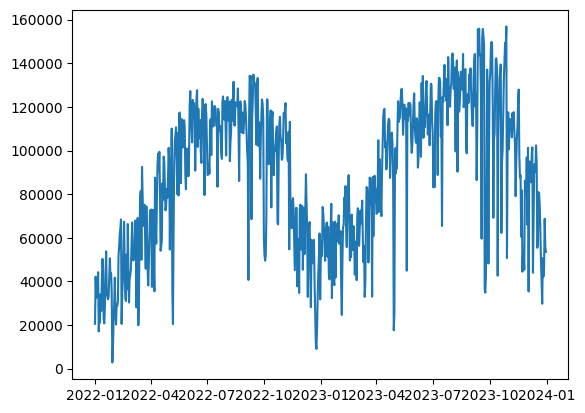

In [7]:
x = m_ts_df['ended_at']
y = m_ts_df['ride_id']

plt.plot(x, y) 
plt.show()

In [11]:
m_ts_df.columns = [i[0] for i in m_ts_df.columns]
m_ts_df.head()

,ended_at,ride_id,end_lng,end_lat
0,2022-01-01,20536,-73.955764,40.749719
1,2022-01-02,42134,-73.955438,40.750176
2,2022-01-03,32492,-73.955554,40.750403
3,2022-01-04,35876,-73.954796,40.751008
4,2022-01-05,33645,-73.954972,40.751162


In [13]:
m_ts_df.to_csv('monthly_rides_2022_2023.csv', index=False)
